In [8]:
import pandas as pd
import argparse
import os
from collections import OrderedDict
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data.dataset import Dataset
import torchvision.transforms.functional as TF
import torchvision
from torchvision import transforms

import albumentations as albu
from albumentations.pytorch import ToTensorV2
from albumentations import OneOf,Compose

from sklearn.model_selection import train_test_split

In [13]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [3]:
TRAIN_DIR = '/home/LUNG_DATA/Efficient_net/train/'

In [31]:
test = np.load(TRAIN_DIR+'0001_NI000_slice001.npy')

In [44]:
np.unique(test)

array([-0.22025777, -0.21653709, -0.21467675, ..., 25.76405947,
       25.84842819, 26.2423318 ])

In [32]:
test.shape

(224, 224, 3)

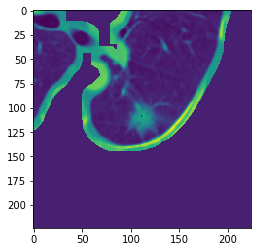

In [33]:
plt.imshow(test[:,:,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


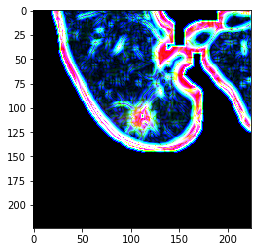

In [34]:
plt.imshow(aug(image=test)['image'])

In [49]:
norm = albu.Normalize(mean= (0.485,0.456,0.406),std=(0.229,0.224,0.225))

In [50]:
normed = norm(image= test)['image']

In [51]:
np.unique(normed)

array([-2.1216757, -2.121612 , -2.1215801, ..., -1.3553976, -1.3539271,
       -1.3470616], dtype=float32)

In [60]:
np.mean(normed[:,:,0])

-2.1150875

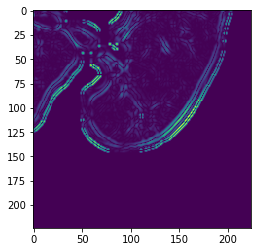

In [57]:
plt.imshow(normed[:,:,2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


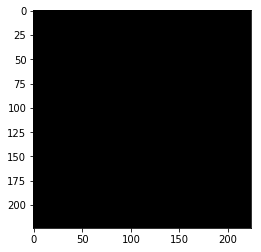

In [41]:

plt.imshow(norm(image= test)['image'])

In [25]:
albu_transformations(test)

AssertionError: force_apply must have bool or int type

In [23]:
aug(image=test)['image'].shape

(224, 224, 3)

In [15]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


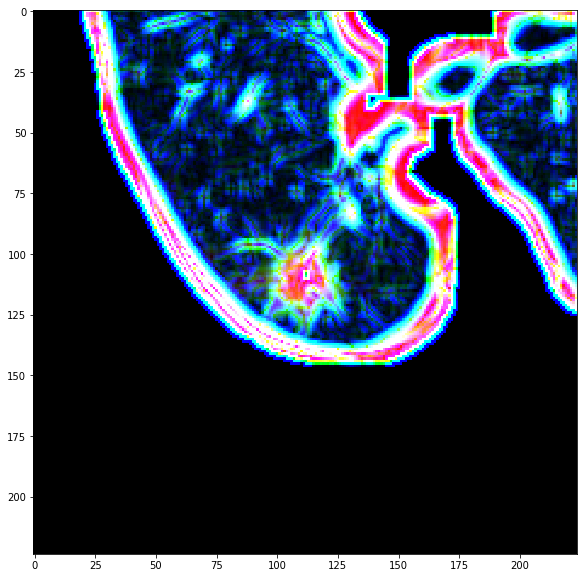

In [17]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, test)

In [9]:
flip = albu.HorizontalFlip()

In [11]:
albu_transformations =  albu.Compose([
            albu.Normalize(),
            ToTensorV2(),
            OneOf([albu.HorizontalFlip(),
                   albu.VerticalFlip(),
                   albu.RandomRotate90(),
                   ],p=0.9)
            #albu.ElasticTransform(alpha=1.1,alpha_affine=0.5,sigma=5,p=0.15),
        ])

In [12]:
albu_transformations(test)

AssertionError: force_apply must have bool or int type